In [7]:
# set up things
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# load necessary libraries
# you should install cartopy with 'conda install -c conda-forge cartopy'
import xarray as xr
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# load nmc_met_io for retrieving micaps server data
import sys
print(sys.path)
sys.path.insert(0, "/home/x711/code/nmc_met_io") # .append("/home/x711/code/nmc_met_io")
print(sys.path)

from nmc_met_io.retrieve_cassandraDB  import *


xr.set_options(display_style="text")

['/home/x711/code/nmc_met_io', '/home/x711/code/ec', '/home/x711/anaconda3/lib/python39.zip', '/home/x711/anaconda3/lib/python3.9', '/home/x711/anaconda3/lib/python3.9/lib-dynload', '', '/home/x711/anaconda3/lib/python3.9/site-packages']
['/home/x711/code/nmc_met_io', '/home/x711/code/nmc_met_io', '/home/x711/code/ec', '/home/x711/anaconda3/lib/python39.zip', '/home/x711/anaconda3/lib/python3.9', '/home/x711/anaconda3/lib/python3.9/lib-dynload', '', '/home/x711/anaconda3/lib/python3.9/site-packages']


## 1.1 读取多个时次的模式预报数据 RH

In [9]:
%time
directoryRH = "ECMWF_HR/RH"
directoryDiv = "ECMWF_HR/DIV"

fhours = np.arange(0, 168, 24)
#filenames = ['22061720.'+'%03d'%(fhour) for fhour in fhours]
filename = '22062220.042'


levels = [1000, 950, 925, 900, 850, 800, 700, 600, 500, 400, 300, 250, 200, 100, 50]

dataRH = get_model_3D_grid(directoryRH, filename, levels)
dataDiv = get_model_3D_grid(directoryDiv, filename, levels)

dataRH

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.53 µs


<xarray.Dataset>
Dimensions:                  (time: 1, level: 15, lat: 281, lon: 361)
Coordinates:
  * time                     (time) datetime64[ns] 2022-06-24T14:00:00
  * level                    (level) float64 1e+03 950.0 925.0 ... 100.0 50.0
  * lat                      (lat) float64 -10.0 -9.75 -9.5 ... 59.5 59.75 60.0
  * lon                      (lon) float64 60.0 60.25 60.5 ... 149.5 149.8 150.0
    forecast_reference_time  datetime64[ns] 2022-06-22T20:00:00
    forecast_period          (time) float64 42.0
Data variables:
    data                     (time, level, lat, lon) float32 85.05 ... 0.4367
Attributes:
    Conventions:  CF-1.6
    Origin:       MICAPS Cassandra DB

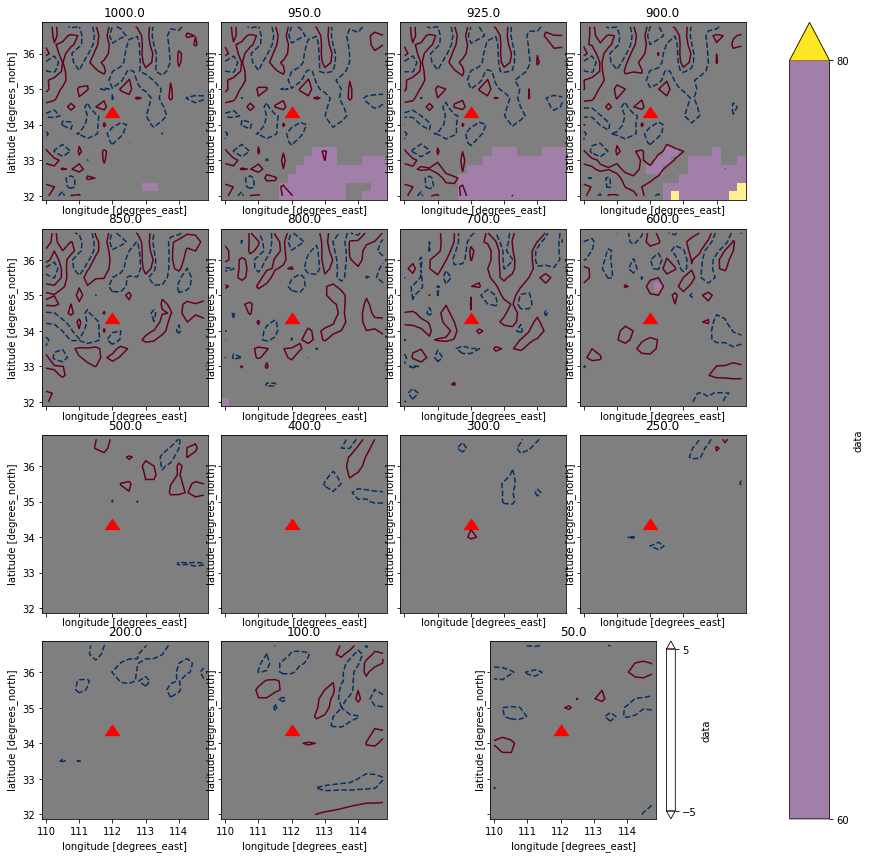

In [10]:
# 绘制图像
left = 110
right=115
top = 37
bottom = 32

marker_lon, marker_lat = 112, 34.5 #118.5, 28.7 #

dataRHarea = dataRH.data.isel(time=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")
dataDivarea = dataDiv.data.isel(time=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")

p = dataRHarea.plot(col='level', col_wrap=4, levels=[60, 80], extend='max',alpha=0.5, add_colorbar=True)

titles = dataDivarea.coords['level'].values
level_count = dataDivarea.sizes['level']

index = 0
for ax in p.axes.flat:
    if(index < level_count):
        add_colorbar = (index == level_count - 1)
        dataDivarea.isel(level=index).plot.contour(ax=ax, levels=[-5, 5], add_colorbar = add_colorbar)
        ax.set_title(titles[index])
        index = index + 1
    ax.scatter(marker_lon, marker_lat, s=200, c='red', marker=6)


" titles = dataDivarea.coords['level'].values\nlevel_count = dataDivarea.sizes['level']\n\nindex = 0\nfor ax in p.axes.flat:\n    if(index < level_count):\n        add_colorbar = (index == level_count - 1)\n        dataDivarea.isel(level=index).plot.contour(ax=ax, levels=[-8, 8], add_colorbar = add_colorbar)\n        ax.set_title(titles[index])\n        index = index + 1\n    ax.scatter(112, 34.5, s=200, c='red', marker=6) "

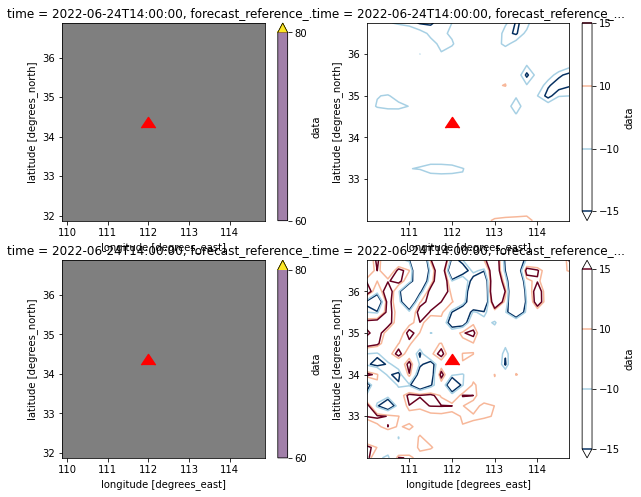

In [11]:
# 绘制图像


dataRHarea = dataRH.data.isel(time=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")

dataDivarea = dataDiv.data.isel(time=0).sel(lon=np.arange(left,right,0.25),lat=np.arange(bottom,top,0.25), method="nearest")

dataRHLow = dataRHarea.sel(level = [925,900, 850, 800, 700,600], method="nearest").mean('level')
dataRHHigh = dataRHarea.sel(level = [300, 250, 200, 100, 50], method="nearest").mean('level')

dataDivLow = dataDivarea.sel(level = [925,900, 850, 800, 700,600], method="nearest").sum('level')
dataDivHigh = dataDivarea.sel(level = [300, 250, 200, 100, 50], method="nearest").sum('level')

plt.figure(figsize=(10, 8))

axHigh1 = plt.subplot(221)
dataRHHigh.plot(ax = axHigh1, levels=[60, 80], extend='max',alpha=0.5, add_colorbar=True)
axHigh1.scatter(marker_lon, marker_lat, s=200, c='red', marker=6)

axHigh = plt.subplot(222)
dataDivHigh.plot.contour(ax = axHigh, levels=[-15, -10, 10, 15], add_colorbar = add_colorbar)
axHigh.scatter(marker_lon, marker_lat, s=200, c='red', marker=6)


axLow1 = plt.subplot(223)
dataRHLow.plot(ax = axLow1, levels=[60, 80], extend='max',alpha=0.5, add_colorbar=True)
axLow1.scatter(marker_lon, marker_lat, s=200, c='red', marker=6)

axLow = plt.subplot(224)
dataDivLow.plot.contour(ax = axLow, levels=[-15, -10, 10, 15], add_colorbar = add_colorbar)
axLow.scatter(marker_lon, marker_lat, s=200, c='red', marker=6)


""" titles = dataDivarea.coords['level'].values
level_count = dataDivarea.sizes['level']

index = 0
for ax in p.axes.flat:
    if(index < level_count):
        add_colorbar = (index == level_count - 1)
        dataDivarea.isel(level=index).plot.contour(ax=ax, levels=[-8, 8], add_colorbar = add_colorbar)
        ax.set_title(titles[index])
        index = index + 1
    ax.scatter(112, 34.5, s=200, c='red', marker=6) """

In [12]:
marker_lon, marker_lat = 118.5, 28.7 #22, 33
marker_lon

a,b,c = 4,7,9

print((b,c))

(7, 9)
